In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('RealEstate-1.csv')

In [4]:
df

,Price,Bedrooms,Bathrooms,PriceSF,Status
0,795000,3,3,335.30,1
1,399000,4,3,141.59,1
2,545000,4,3,179.75,1
3,909000,4,4,256.78,1
4,109900,3,1,87.99,1
...,...,...,...,...,...
732,319900,3,3,199.31,2
733,495000,3,2,263.72,2
734,372000,3,2,336.96,3
735,589000,3,2,298.23,2


In [10]:
X = pd.get_dummies(df, columns =  ['Bedrooms', 'Bathrooms', 'Status'])

In [18]:
delta_price = max(X['Price']) - min(X['Price'])

In [20]:
X['Price'] = (X['Price'] - min(X['Price']))/delta_price

In [22]:
delta_pricesf = max(X['PriceSF']) - min(X['PriceSF'])

In [23]:
X['PriceSF'] = (X['PriceSF'] - min(X['PriceSF']))/delta_pricesf

In [24]:
X

,Price,PriceSF,Bedrooms_0,Bedrooms_1,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bathrooms_1,Bathrooms_2,Bathrooms_3,Bathrooms_4,Status_1,Status_2,Status_3
0,0.389410,0.280785,0,0,0,1,0,0,0,1,0,1,0,0
1,0.188751,0.108646,0,0,0,0,1,0,0,1,0,1,0,0
2,0.262731,0.142556,0,0,0,0,1,0,0,1,0,1,0,0
3,0.447175,0.211009,0,0,0,0,1,0,0,0,1,1,0,0
4,0.042260,0.061014,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.148670,0.159938,0,0,0,1,0,0,0,1,0,0,1,0
733,0.237395,0.217176,0,0,0,1,0,0,1,0,0,0,1,0
734,0.175070,0.282260,0,0,0,1,0,0,1,0,0,0,0,1
735,0.285027,0.247843,0,0,0,1,0,0,1,0,0,0,1,0


In [48]:
y = np.asarray(X['Price']).reshape(737,1)

In [49]:
y.shape

(737, 1)

In [50]:
group_1 = np.asarray(X['PriceSF']).reshape(737,1)

In [38]:
group_2 = np.asarray(X.iloc[:, 2:7])

In [40]:
group_3 = np.asarray(X.iloc[:, 7:11])

In [42]:
group_4 = np.asarray(X.iloc[:, 11:])

In [72]:
group_5 = np.ones([737,1]).reshape(737,1)

In [190]:
theta_1 = np.random.uniform(size =[1,1])

In [191]:
theta_2 = np.random.uniform(size = [group_2.shape[1], 1])

In [192]:
theta_3 = np.random.uniform(size = [group_3.shape[1], 1])
theta_4 = np.random.uniform(size = [group_4.shape[1], 1])
theta_5 = np.random.uniform(size = [group_5.shape[1], 1])

In [193]:
theta = [[theta_1],[theta_2],[theta_3],[theta_4], [theta_5]]

In [194]:
group = [group_1, group_2, group_3, group_4, group_5]

In [195]:
for k in range(1000):
    for j in range(0,5):
        sum_ = np.zeros([737,1])
        for i in range(0,5):
            sum_ += np.dot(group[i], theta[i][k])
        sub = y - sum_
        a = theta[j][k] - 0.00001*-np.dot(group[j].T, sub )
        if 0.00001*0.012 < np.linalg.norm(a):
            theta_j = (1-0.00001*0.012/np.linalg.norm(a))*a
            theta[j].append(theta_j)
        else:
            theta[j].append(0)
            
            
        
        

In [209]:
error = []
for k in range(1000):
    h = 0
    sum_ = np.zeros([737,1])
    
    for j in range(0,5):
        sum_ += np.dot(group[j],theta[j][k])
        h+=  np.linalg.norm(theta[j][k])
    sub = y - sum_
    err = 0.5 * np.linalg.norm(sub)**2 + 0.012*h
    error.append(err)
    

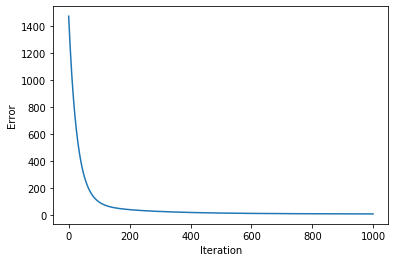

In [212]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,1000)), error)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()